### Aim of the Study
##### Find the variables that will help us understand the defaults. i.e find out variables tha are strongly indicating that a customer will default.

## Things that needs to be taken care
1. Data Understanding
2. Data Cleaning & Manipulation
3. Data Analysis
4. Prsentation & Recommendations

## Steps in Data Understanding
1. Go through the loan.csv file and read the columns.
2. Go through the data dictionary and understand the importance of each column.

## Steps to Data Cleaning
1. Check if we have Missing Values
2. Remove columns with high missing percentages
3. Impute data in columns with acceptable missing percentages
4. Drop rows where missing value percentage is very high
5. Remove outliers from data

## Steps to data analysis
1. Identify variables that are related to the applicant
2. Identify characteristics of loan.
3. Indetify customer behaviour variables.
4. Get rid if rows were loan status is 'current'
5. Since customer behivaiour variables are not available at application time, get rid of them too, however, retain those which are available via credit bureau

## Data Analysis
As part of Data Analysis we'll perform following operations
1. Univariate Analysis
2. Bi-Variate Analysis
3. Correlation Analysisnual_inc
installment
revol_bal
revol_util

#### Import necessarry libraries

In [1034]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1035]:
#prevent pandas from truncating output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data Understanding

In [1037]:
#read the given data file using pandas to a dataframe
loan = pd.read_csv("https://raw.githubusercontent.com/Pranay8070/LendingClubCaseStudy/refs/heads/master/loan/loan.csv")


C:\Users\hp\AppData\Local\Temp\ipykernel_21120\165404855.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("https://raw.githubusercontent.com/Pranay8070/LendingClubCaseStudy/refs/heads/master/loan/loan.csv")


In [1038]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [1039]:
loan.shape

(39717, 111)

In [1040]:
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [1041]:
non_na_counts = loan.count()
print(non_na_counts)
#count function ignores NaN or missing values when counting the entries in each column.

id                                39717
member_id                         39717
loan_amnt                         39717
funded_amnt                       39717
funded_amnt_inv                   39717
term                              39717
int_rate                          39717
installment                       39717
grade                             39717
sub_grade                         39717
emp_title                         37258
emp_length                        38642
home_ownership                    39717
annual_inc                        39717
verification_status               39717
issue_d                           39717
loan_status                       39717
pymnt_plan                        39717
url                               39717
desc                              26775
purpose                           39717
title                             39706
zip_code                          39717
addr_state                        39717
dti                               39717


## Data Cleaning

#### check if data has more than one loan per customer

In [1044]:
 a=loan.member_id.value_counts().sum()
a

39717

In [1045]:
b=loan.id.count()
b

39717

In [1046]:
a-b
#one unique loan per customer

0

In [1047]:
#get list of loan statuses
loan.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [1048]:
#check term column
loan.term.value_counts()

term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [1049]:
#dropping all columns which is having null data and only one unique value

loan.dropna(how='all',axis=1,inplace=True)
loan.shape

#columns drastically decreased when we dropped columns with null values

(39717, 57)

In [1050]:
for col in loan.columns:
    if (loan[col].nunique()==1):
        loan.drop([col], axis = 1,inplace=True)

loan.shape

(39717, 48)

In [1051]:
#drop columns as there are substantial amount of null values or data that cannot be statistically analysed easily
#Most of the daya is not available and few columns cannot be used for calculation( does not have any meaning)

loan.drop(['url','desc','id','member_id','title','emp_title','mths_since_last_record','mths_since_last_delinq','next_pymnt_d','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'], axis = 1,inplace=True)

In [1052]:
loan.shape

(39717, 29)

In [1053]:
non_na_counts = loan.count()
print(non_na_counts)
#Now we have columns with data which are needed for actual analysis

loan_amnt               39717
funded_amnt             39717
funded_amnt_inv         39717
term                    39717
int_rate                39717
installment             39717
grade                   39717
sub_grade               39717
emp_length              38642
home_ownership          39717
annual_inc              39717
verification_status     39717
issue_d                 39717
loan_status             39717
purpose                 39717
zip_code                39717
addr_state              39717
dti                     39717
delinq_2yrs             39717
earliest_cr_line        39717
inq_last_6mths          39717
open_acc                39717
pub_rec                 39717
revol_bal               39717
revol_util              39667
total_acc               39717
out_prncp               39717
out_prncp_inv           39717
pub_rec_bankruptcies    39020
dtype: int64


In [1054]:
##Start cleaning actual data inside the columns
#1. In term month we can remove the 'months' part occurring

loan.term.value_counts()
#loan.term.dtype
loan.term=loan.term.apply(lambda x : int(x.replace("months","")))
loan.term.value_counts()                        

term
36    29096
60    10621
Name: count, dtype: int64

In [1055]:
#2. Remove % from int_rate and convert to float 

##loan.int_rate.value_counts()
loan.int_rate=loan.int_rate.apply(lambda x: float(x.replace("%","")))
loan.int_rate.value_counts()

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
7.49     656
11.71    607
9.99     603
7.90     582
5.42     573
11.99    532
12.69    491
10.37    468
6.03     447
12.99    446
8.49     445
12.42    442
10.65    435
5.79     410
8.90     402
7.29     397
6.62     396
11.86    391
14.27    390
10.59    380
9.63     378
9.91     377
5.99     347
7.14     341
6.99     336
11.11    331
12.53    327
16.77    327
10.74    312
6.54     305
6.91     303
8.94     294
7.66     292
13.61    291
15.99    286
13.98    284
13.23    263
11.12    259
13.99    257
6.17     252
10.00    251
12.68    251
10.75    250
10.36    250
11.36    247
16.49    241
11.83    233
18.25    230
10.62    228
14.65    222
13.06    220
10.38    219
10.25    218
15.23    215
14.96    214
16.89    209
15.65    208
11.14    206
6.92     204
12.18    203
17.27    203
15.27    200
15.95    199
16.32    198
14.79    192
8.00     191
17.49    190
12.73    187
15.21    187
9.62     186
15.58    185
9.3

In [1056]:
#3. Convert date into month name and 2 digit year format

loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y')

In [1057]:
#4. Convert date fields and split into month and year format for analysing monthly and yearly

loan['issue_d_month']=pd.DatetimeIndex(loan['issue_d']).month
loan['issue_d_year']=pd.DatetimeIndex(loan['issue_d']).year

loan['earliest_cr_line_month']=pd.DatetimeIndex(loan['earliest_cr_line']).month
loan['earliest_cr_line_year']=pd.DatetimeIndex(loan['earliest_cr_line']).year

In [1058]:
#5. delete all rows where loan status is current

loan=loan[loan.loan_status !='Current']
loan.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70%,9,0.0,0.0,0.0,12,2011,1,1985
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,0.0,0.0,0.0,12,2011,4,1999
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.50%,10,0.0,0.0,0.0,12,2011,11,2001
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21%,37,0.0,0.0,0.0,12,2011,2,1996
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30%,12,0.0,0.0,0.0,12,2011,11,2004


In [1059]:
#6. Clean emp length field like removbe years,year,replace 10+with 10 and less than 1 to 0

#loan.emp_length=loan.emp_length.apply(lambda x: str(x).replace("years","")) -- giving warning so used loc method
loan.loc[:, 'emp_length'] = loan.loc[:, 'emp_length'].str.replace("years", "")

loan.loc[:, 'emp_length'] = loan.loc[:, 'emp_length'].str.replace("year", "")
loan.loc[:, 'emp_length'] = loan.loc[:, 'emp_length'].str.replace("10+", "10")
loan.loc[:, 'emp_length'] = loan.loc[:, 'emp_length'].str.replace("<1", "0")
loan.loc[:, 'emp_length'] = loan.loc[:, 'emp_length'].str.replace("< 1", "0")

loan.emp_length.value_counts()


emp_length
10     8488
0      4508
2      4291
3      4012
4      3342
5      3194
1      3169
6      2168
7      1711
8      1435
9      1226
Name: count, dtype: int64

In [1060]:
#7 Remove % from revol_util and convert to float  
loan.revol_util.value_counts()
loan.revol_util=loan.revol_util.apply(lambda x: float(str(x).replace("%",""))) 
##here we are getting error due to float type so first convert to string and replace
loan.revol_util.value_counts()

revol_util
0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: count, Length: 1088, dtype: int64

In [1061]:
loan.shape

# #8. convert loan status to 0 and 1 i.e bindary value
# # loan.loan_status.value_counts()

# loan.loan_status=loan.loan_status.apply(lambda x : 1 if x=="Fully Paid" else 0)
# loan.loan_status.value_counts()

# # or use this to avoid warning
# # loan.loc[loan['loan_status'] == 'Fully Paid', 'loan_status'] = 1
# # loan.loc[loan['loan_status'] != 'Fully Paid', 'loan_status'] = 0

(38577, 33)

In [1062]:
loan.nunique()

loan_amnt                   870
funded_amnt                1019
funded_amnt_inv            8050
term                          2
int_rate                    370
installment               15022
grade                         7
sub_grade                    35
emp_length                   11
home_ownership                5
annual_inc                 5215
verification_status           3
issue_d                      55
loan_status                   2
purpose                      14
zip_code                    822
addr_state                   50
dti                        2853
delinq_2yrs                  11
earliest_cr_line            524
inq_last_6mths                9
open_acc                     40
pub_rec                       5
revol_bal                 21275
revol_util                 1088
total_acc                    82
out_prncp                     1
out_prncp_inv                 1
pub_rec_bankruptcies          3
issue_d_month                12
issue_d_year                  5
earliest

In [1063]:
#9 create 2 dataframes for fully paid and charged off

# loan_fully_paid = loan.loc[loan['loan_status'] == 1]
# loan_charged_off = loan.loc[loan['loan_status'] == 0]

loan=loan[loan.loan_status=='Charged Off']
loan.shape

(5627, 33)

#### Check rows if it is having duplicate, null 

In [1065]:
#10. Duplicate check

loan[loan.duplicated()]
#No dups


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year


In [1066]:

loan.columns[loan.isna().sum()>0]

Index(['emp_length', 'revol_util', 'pub_rec_bankruptcies'], dtype='object')

In [1067]:
missing_val = loan[loan.columns[loan.isna().sum() > 0]].isna().sum()
print(missing_val)
print("% of missing values wrt total number of rows: " , round(missing_val.sum()/len(loan)*100,2))

#better to remove null values rather than imputing data as we have very less null values here

emp_length              228
revol_util               16
pub_rec_bankruptcies    118
dtype: int64
% of missing values wrt total number of rows:  6.43


In [1068]:
loan=loan[(loan.revol_util.notna()) & (loan.pub_rec_bankruptcies.notna())]
loan.isna().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                227
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
out_prncp                   0
out_prncp_inv               0
pub_rec_bankruptcies        0
issue_d_month               0
issue_d_year                0
earliest_cr_line_month      0
earliest_cr_line_year       0
dtype: int

In [1069]:
#updating the verification_status column values.
#loan.verification_status.value_counts()
loan.loc[loan.verification_status == 'Source Verified','verification_status'] = 'Verified'
loan.verification_status.value_counts()

verification_status
Verified        3476
Not Verified    2017
Name: count, dtype: int64

## Data outliers

In [1071]:
# List all quantative variables.
loan.columns[loan.dtypes != 'object']

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year'], dtype='object')

## NOTE As part of the analysis we'll look at following columns for outlier
1.
annual_i n2.c
 d3.ti
loan_ a4.mnt
funded_amnt & funded_amn t5._inv
in t6._rate
earliest_cr  _line_y

#### Outliers in annual income


<Axes: ylabel='annual_inc'>

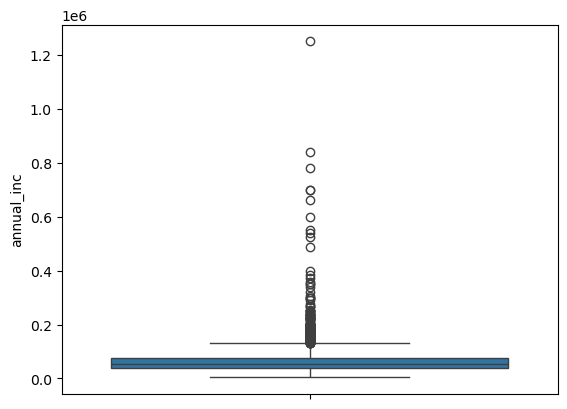

In [1074]:
#plotting annual income
sns.boxplot(y=loan.annual_inc)

In [1075]:
loan.annual_inc.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.96,.97,.98,.99])

0.10     26803.20
0.20     35000.00
0.30     40000.00
0.40     47000.00
0.50     53000.00
0.60     60000.00
0.70     69996.00
0.80     80000.00
0.90    102900.00
0.95    129398.40
0.96    140000.00
0.97    150000.00
0.98    171161.28
0.99    202080.00
Name: annual_inc, dtype: float64

Inference There is a big jump in annual_inc between 95 and 99. lets drop the values above 95th percentile.

<Axes: ylabel='annual_inc'>

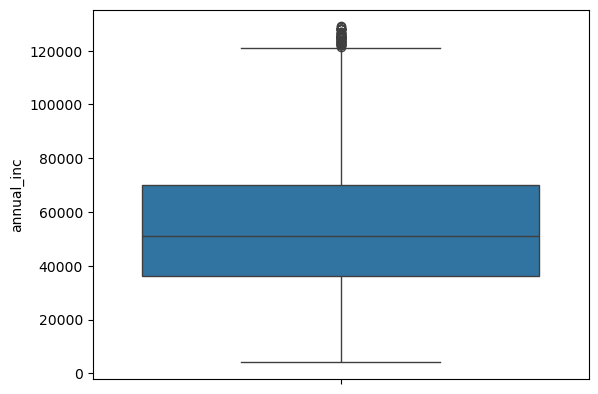

In [1077]:
#Dropping the top 5 percentile values and plotting the annual_inc again
loan = loan[loan.annual_inc <= loan.annual_inc.quantile(.95)]
sns.boxplot(y=loan.annual_inc)

In [1078]:
loan.annual_inc.describe()

count      5218.000000
mean      55339.620301
std       25027.692723
min        4080.000000
25%       36000.000000
50%       51000.000000
75%       70000.000000
max      129000.000000
Name: annual_inc, dtype: float64

#### Outliers in dti

<Axes: ylabel='dti'>

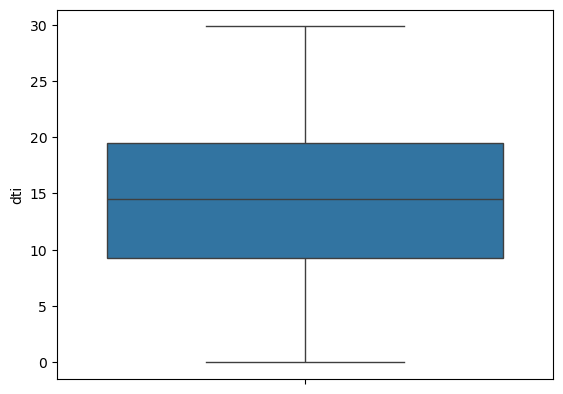

In [1080]:
sns.boxplot(y=loan.dti)

Inference there are no outliers in the dti section.

#### Outliers in loan amount

<Axes: ylabel='loan_amnt'>

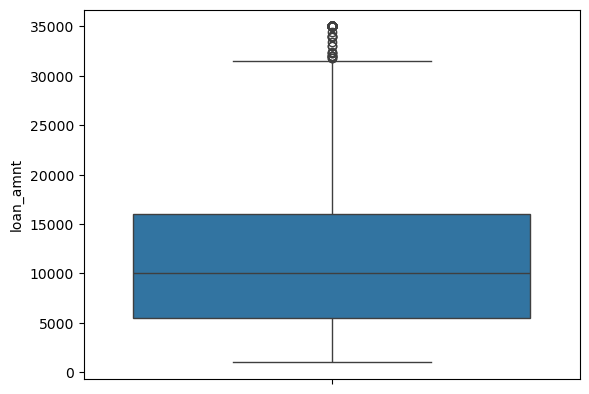

In [1083]:
sns.boxplot(y=loan.loan_amnt)

In [1084]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year'], dtype='object')

In [1085]:
#looking at loan_amnt distribution
print(loan.loan_amnt.describe())
loan.loan_amnt.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])

count     5218.000000
mean     11746.195860
std       7852.200355
min       1000.000000
25%       5500.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


0.10     3060.0
0.20     5000.0
0.30     6000.0
0.40     8000.0
0.50    10000.0
0.60    12000.0
0.70    15000.0
0.80    18000.0
0.90    24000.0
0.95    25475.0
0.99    35000.0
Name: loan_amnt, dtype: float64

Inference

Although there are some outlier, the distribution for loan amount is uniform. no need to remove any outliers from the loan_amnt column.

####  Outliers in funded amount and funded amount by investors

<Axes: ylabel='funded_amnt'>

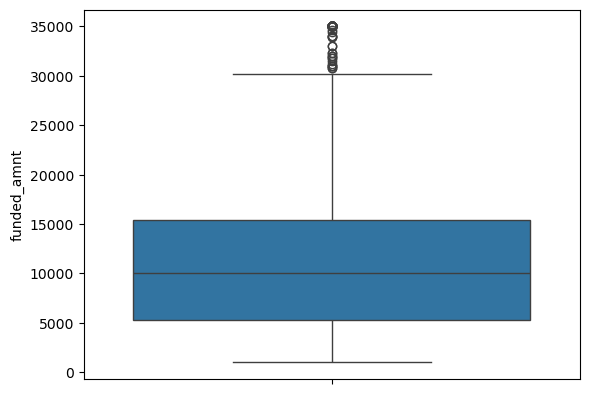

In [1088]:
sns.boxplot(y=loan.funded_amnt)

In [1089]:
#looking at funded_amnt distribution
print(loan.funded_amnt.describe())
loan.funded_amnt.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])

count     5218.000000
mean     11415.412993
std       7533.006199
min       1000.000000
25%       5306.250000
50%      10000.000000
75%      15450.000000
max      35000.000000
Name: funded_amnt, dtype: float64


0.10     3000.0
0.20     5000.0
0.30     6000.0
0.40     8000.0
0.50    10000.0
0.60    12000.0
0.70    14800.0
0.80    17325.0
0.90    22000.0
0.95    25000.0
0.99    35000.0
Name: funded_amnt, dtype: float64

<Axes: ylabel='funded_amnt_inv'>

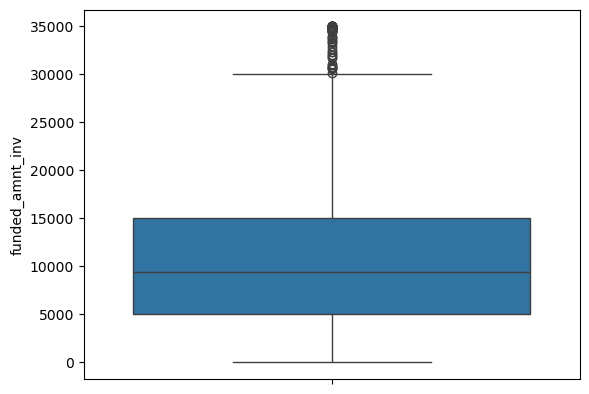

In [1090]:
sns.boxplot(y=loan.funded_amnt_inv)

In [1091]:
#looking at funded_amnt_inv distribution
print(loan.funded_amnt_inv.describe())
loan.funded_amnt_inv.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])

count     5218.000000
mean     10758.884191
std       7373.463338
min          0.000000
25%       5000.000000
50%       9400.001074
75%      15000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


0.10     2928.689000
0.20     4499.998714
0.30     5775.000275
0.40     7354.208714
0.50     9400.001074
0.60    11241.200000
0.70    13797.500000
0.80    16118.568000
0.90    20751.850880
0.95    24950.000000
0.99    34950.000000
Name: funded_amnt_inv, dtype: float64

Inference

loan_amnt, funded_amnt and funded_amnt_inv seems to follow the same trend which is expected.
although there are some outlier. we can leave these as the distribution is almost continious.

## Data Analysis

## Univariate analysis

####  Understanding colums based on variable type
- Categorical Variables
  - Ordered
      1. grade
      2. sub_grade
      3. emp_length
      4. term
      5. issue_d_y
      6. issue_d_m
      7. earliest_cr_line_m
      8. earliest_cr_line_y
   - Un ordered
      1. home_ownership
      2. verification_status
      3. issue_d
      4. purpose
      5. zip_code
      6. addr_state
      7. delinq_2yrs
      8. inq_last_6mths
      9.  open_acc
      10. pub_rec
      11. total_acc
      12. pub_rec_bankruptcies
  
- Quantative
  1. loan_amnt
  2. funded_amnt
  3. funded_amnt_inv
  4. int_rate
  5. dti
  6. annual_inc
  7. installment
  8. revol_bal
  9. revol_util

#### Ordered Categorical Variable Analysis

<Axes: xlabel='grade', ylabel='percent'>

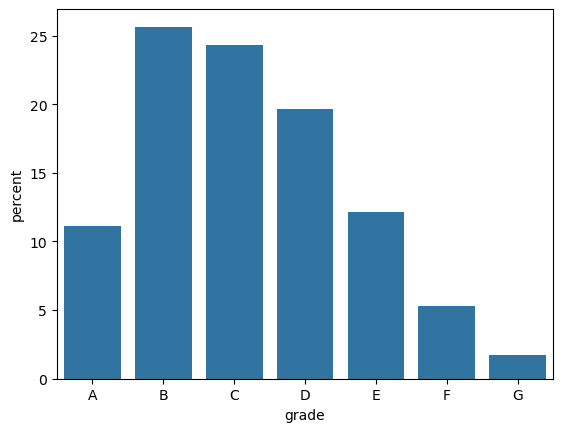

In [1097]:
sns.countplot(x = 'grade', data = loan, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],stat='percent')

Category  B and C makes up for charged of loans

In [1099]:
#listing subgrade counts
loan.sub_grade.value_counts()

sub_grade
B5    337
B3    320
C1    311
B4    311
C2    303
C3    259
D2    249
D3    235
A5    210
B2    209
C4    199
C5    198
D4    198
D5    193
E1    179
A4    170
B1    161
D1    151
E2    142
E4    113
E3    107
A3     97
E5     93
F1     79
A2     73
F2     62
F5     48
F3     45
F4     44
A1     30
G1     28
G2     25
G3     19
G4     11
G5      9
Name: count, dtype: int64

In [1100]:
#subgrades are listed with their grade as well. lets fix this.
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x: x[-1]))

<Axes: xlabel='grade', ylabel='count'>

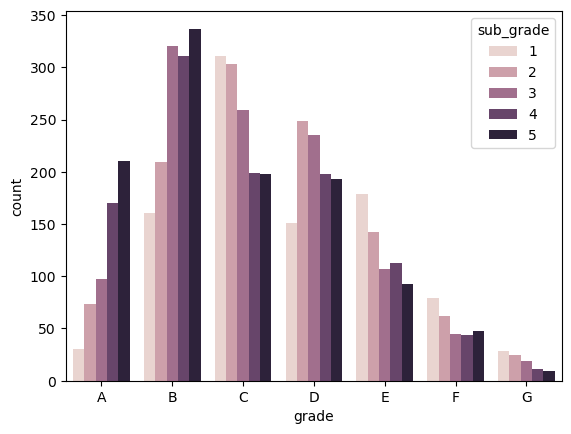

In [1101]:
#Plotting grades with subgrade hue.
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan)

#### Purpose:
This plot is useful for:

Understanding the distribution of loans across different grades and sub-grades.

<Axes: xlabel='emp_length', ylabel='count'>

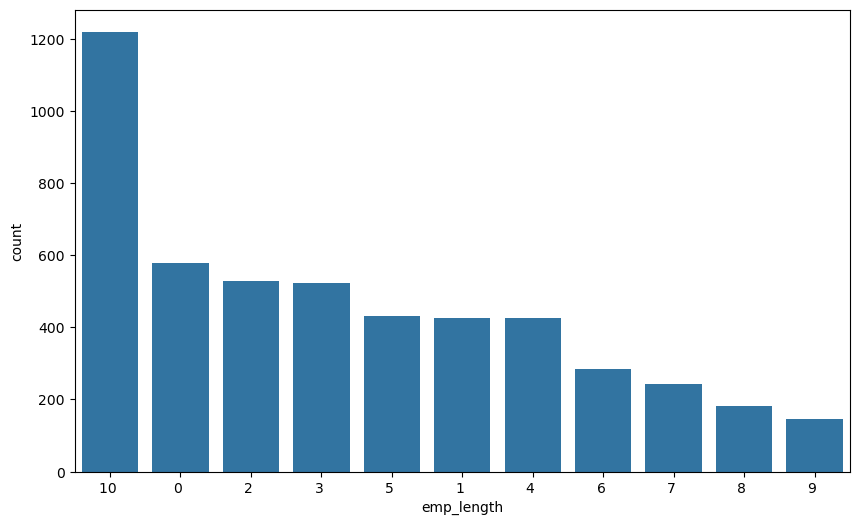

In [1103]:
#Plotting emp_length
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(data=loan,x='emp_length',order=loan.emp_length.value_counts().index)

In [1104]:
print("Percent distribution of emp_length\n",round(loan.emp_length.value_counts()/loan.shape[0]*100,2))

Percent distribution of emp_length
 emp_length
10     23.38
0      11.10
2      10.14
3      10.04
5       8.28
1       8.18
4       8.14
6       5.44
7       4.68
8       3.51
9       2.82
Name: count, dtype: float64


**Inference**
1. 10+ Years emp_length has the highest charged off loans at 24.44% followed by <1 Year at 11.58
2. There is a big jump(3% to 24%) in loan defaults from 9 Years to 10+ Year.

<Axes: xlabel='term', ylabel='percent'>

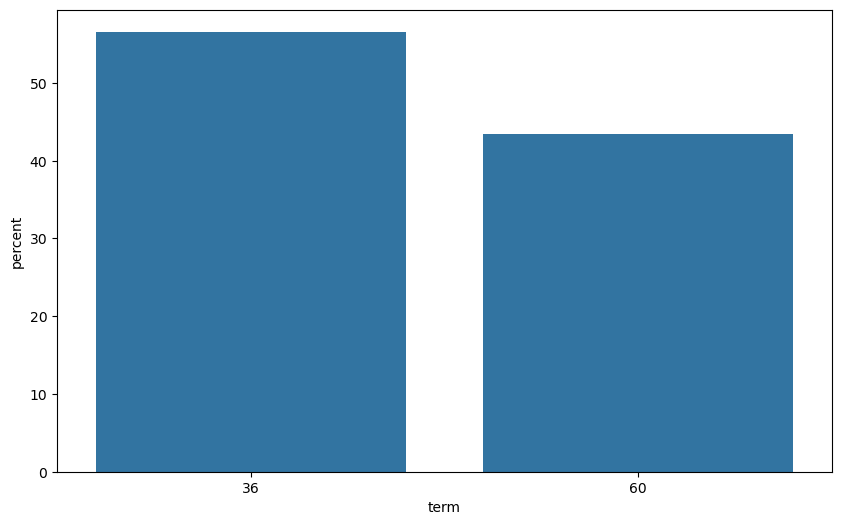

In [1106]:
fig,ax=plt.subplots(figsize=(10,6))
sns.countplot(data=loan,x='term',order=loan.term.value_counts().index,stat='percent')

**Inference**
1. More than 50% of defaulted loans are taken for lower term.

<Axes: xlabel='issue_d_year', ylabel='count'>

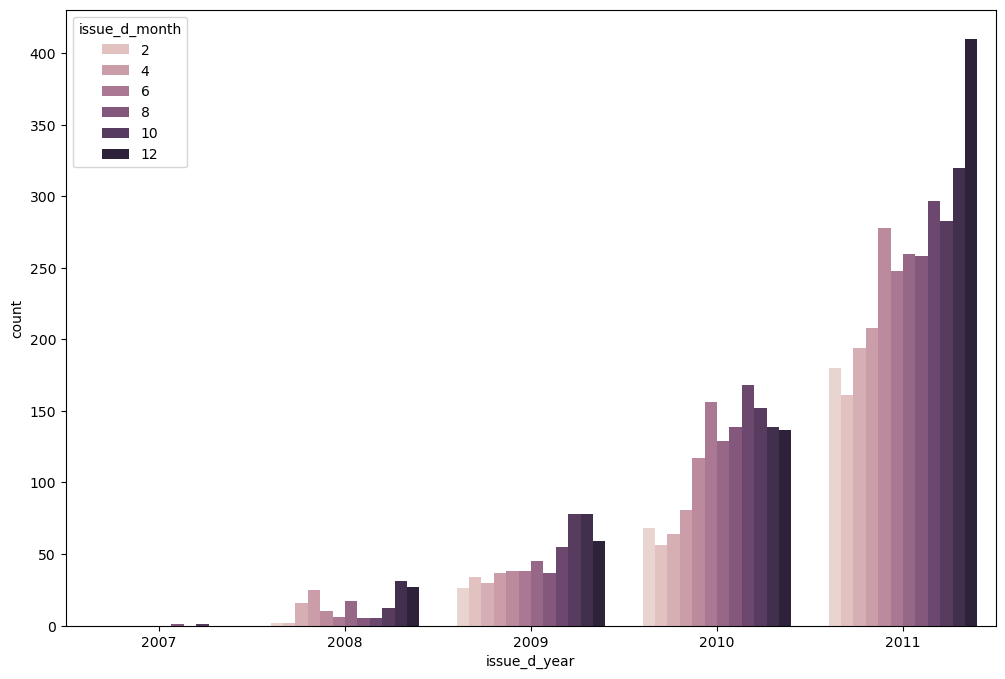

In [1108]:
#Plotting loan issue year with loan issue month hue.
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(data=loan, x='issue_d_year', hue='issue_d_month')

**Inference**
1. We see an upward trend in number of defaulted loans over the years. 
2. most of the defaulted loans tends to be approved around end of year, this co-incides with the holiday seasons.

#### Un-Ordered Categorical Variable Analysis

<Axes: xlabel='home_ownership', ylabel='percent'>

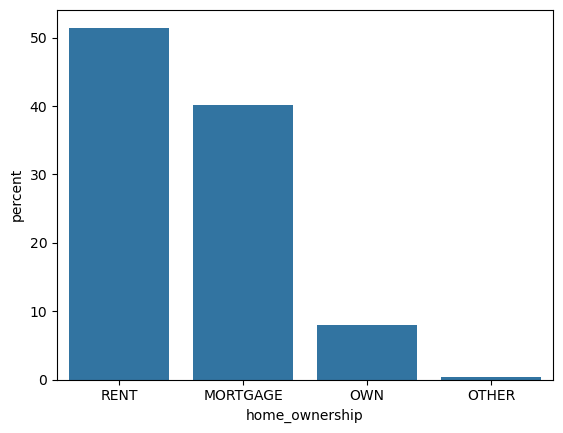

In [1111]:
#Plotting home ownership
sns.countplot(data=loan,x='home_ownership',order=loan.home_ownership.value_counts().index,stat='percent')

**Inference**
- Customers with Rented and Mortgaged homes make up for 90% of charged off loans. 
  - This might be due to the additional financial commitments for rent and mortgage payments. 
  - The LC should take extra precautions when considering borrowers ability to pay the installments if they have other fixed financial commitments.

<Axes: xlabel='verification_status', ylabel='percent'>

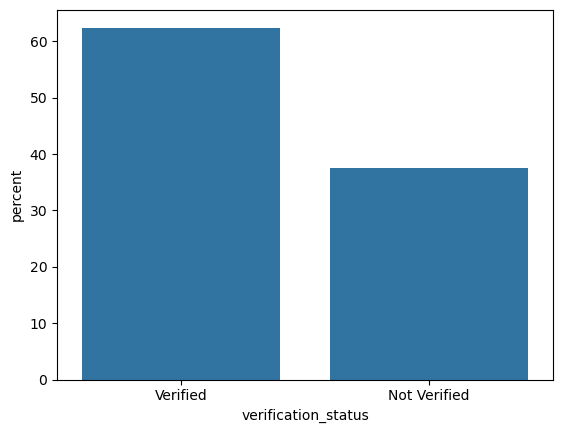

In [1113]:
#Plotting verification_status
sns.countplot(data=loan,x='verification_status',order=loan.verification_status.value_counts().index,stat='percent')

**Inference**
1. Verified income loans makes up for over 60% of defaulted loans. 
2. LC needs to apply stricter methods for loan repayment capacity decisions.

<Axes: xlabel='percent', ylabel='purpose'>

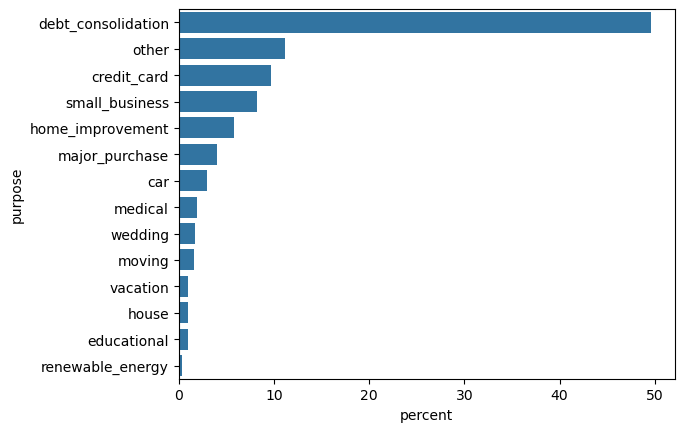

In [1115]:
#plotting purpose
sns.countplot(data=loan,y='purpose',order=loan.purpose.value_counts().index,stat='percent')

**Inference**
1. Customer who take loans for debt_consolidation are at a higher risk of defaulting as they are already under financial pressure and might not meet the commitment.

<Axes: xlabel='addr_state', ylabel='percent'>

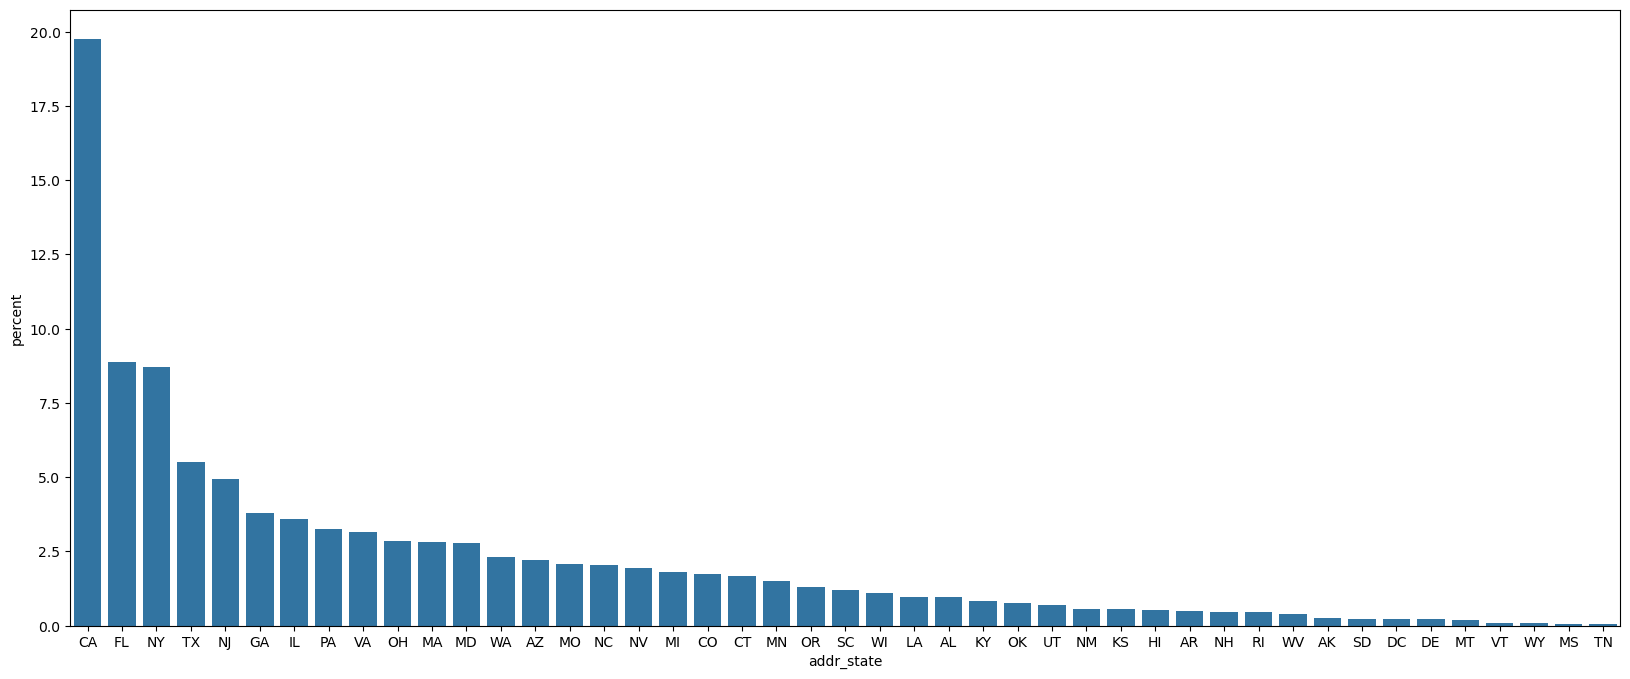

In [1117]:
fig,ax = plt.subplots(figsize=(20,8))
sns.countplot(data=loan,x='addr_state',order=loan.addr_state.value_counts().index,stat='percent')

**Inference**
1. Most of the defaulted borrowers come from states such as California, Florida, New York, Texas and New Jersey.

<Axes: xlabel='delinq_2yrs', ylabel='percent'>

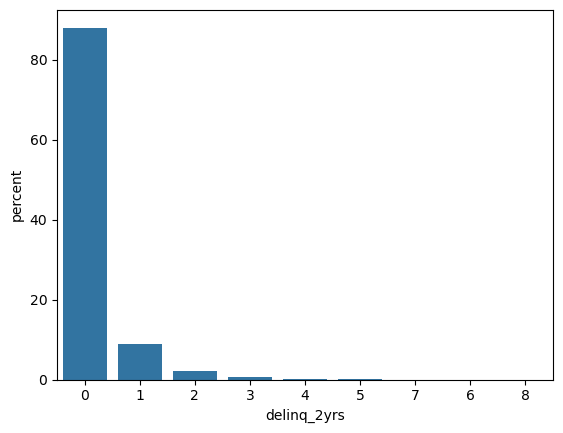

In [1119]:
#Plotting delinquicies in last 2 year.
sns.countplot(data=loan,x='delinq_2yrs',order=loan.delinq_2yrs.value_counts().index,stat='percent')

<Axes: xlabel='inq_last_6mths', ylabel='percent'>

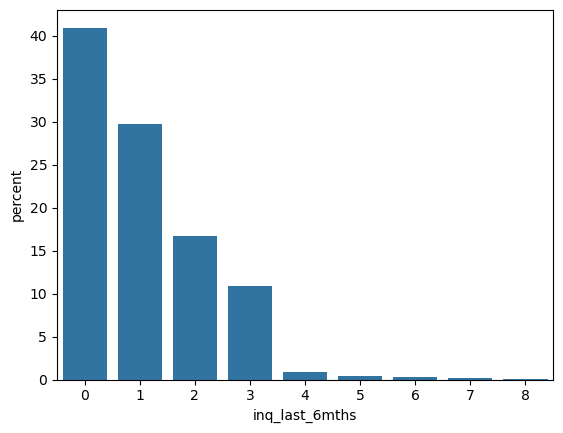

In [1120]:
#plotting inquiries
sns.countplot(data=loan,x='inq_last_6mths',order=loan.inq_last_6mths.value_counts().index,stat='percent')

**Inference**
1.  high number of credit inquiries are less likely to default.

<Axes: xlabel='pub_rec', ylabel='percent'>

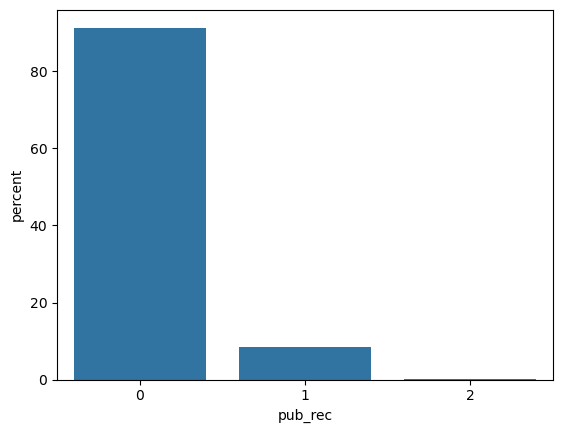

In [1122]:
#Plotting pub_rec
sns.countplot(data=loan,x='pub_rec',order=loan.pub_rec.value_counts().index,stat='percent')

<Axes: xlabel='pub_rec_bankruptcies', ylabel='percent'>

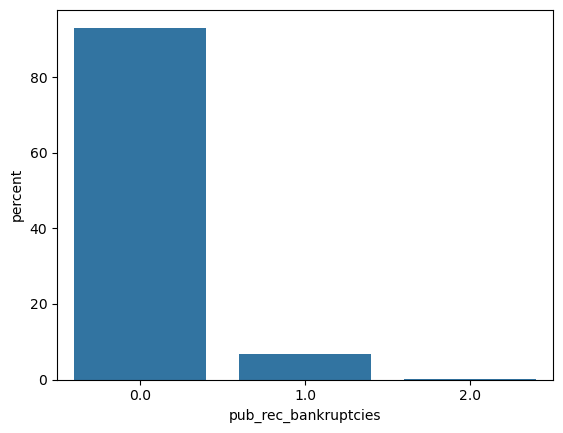

In [1123]:
#plotting pub_rec_bankruptcies
sns.countplot(data=loan,x='pub_rec_bankruptcies',order=loan.pub_rec_bankruptcies.value_counts().index,stat='percent')

**Inference**
1. customer with past public deliquency record or bankruptcy recoreds are less likely to default on loans than the customer with no past public record. 
  - This might be due to the fact the customers who have public record tends to be more diligent in paying back what they owe as they are aware of the negative impact of such loans.

#### 5.1.4 - Quantative Variable Analysis

In [1126]:
# Analyse loan amount
print(loan.loan_amnt.describe())
print(loan.funded_amnt.describe())
print(loan.funded_amnt_inv.describe())

count     5218.000000
mean     11746.195860
std       7852.200355
min       1000.000000
25%       5500.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
count     5218.000000
mean     11415.412993
std       7533.006199
min       1000.000000
25%       5306.250000
50%      10000.000000
75%      15450.000000
max      35000.000000
Name: funded_amnt, dtype: float64
count     5218.000000
mean     10758.884191
std       7373.463338
min          0.000000
25%       5000.000000
50%       9400.001074
75%      15000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


**Inference**
1. loan_amnt, funded_amnt and funded_amnt_inv have similar min, max and distributions. So we will use loan_amnt for further analysis.

<Figure size 1000x600 with 0 Axes>

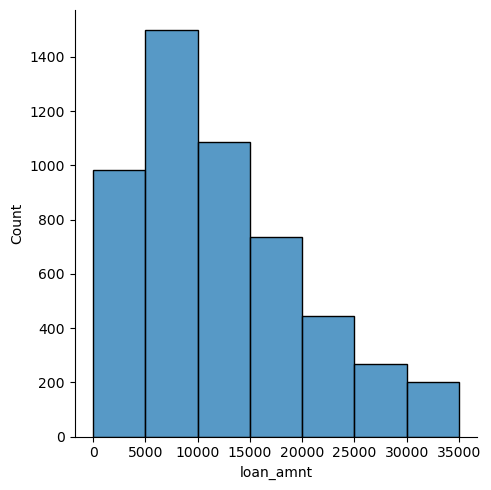

In [1128]:
#plotting loan_amnt
bins = range(0,40000,5000)
plt.figure(figsize=(10,6))
sns.displot(data=loan, x='loan_amnt',bins=bins)

**Inference**
1. The loan amount for charged off loans is left skewed, meaning that borrowers who borrow smaller amounts tend to default more. 
2. Loans in the range of 5-15K are at higher risk of defaulting.

In [1130]:
#Analyse int_rate
loan.int_rate.describe()

count    5218.000000
mean       13.787570
std         3.646034
min         5.420000
25%        11.340000
50%        13.590000
75%        16.350000
max        24.400000
Name: int_rate, dtype: float64

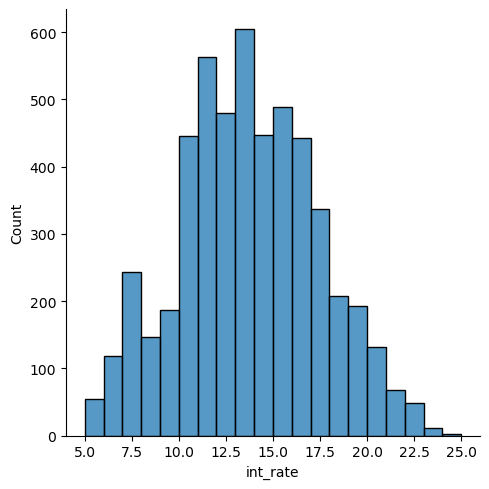

In [1131]:
sns.displot(data=loan, x='int_rate',bins=range(5,26))

**Inference**
1. We see a sharp uptick in defaulted loans between int_rate 10 and 17 after which the trend seems to die down as int rate increases. 
2. Maximum defaulted loans have int_rate between 10 and 17 percent.
3. Surprisingly, loans with higher interest rate >18% have very low default rates.

In [1133]:
#analyse dti
loan.dti.describe()

count    5218.000000
mean       14.180585
std         6.579410
min         0.000000
25%         9.272500
50%        14.495000
75%        19.530000
max        29.850000
Name: dti, dtype: float64

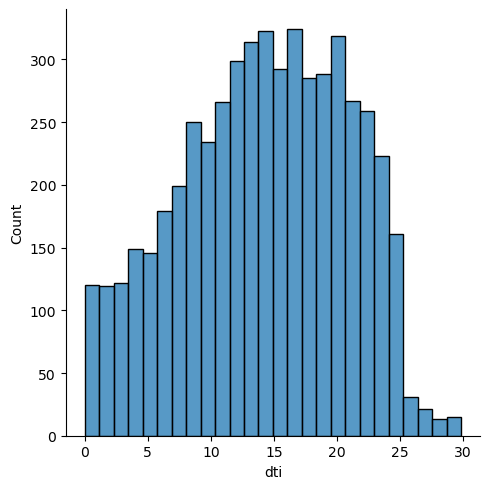

In [1134]:
sns.displot(data=loan,x='dti')

**Inference**
1. majority of charged off loans have a dti between 10-20%.
2.  nubmber of charged off loans shows a downward trend for dti higher than 20.

In [1136]:
#Analyse annual_inc
loan.annual_inc.describe()

count      5218.000000
mean      55339.620301
std       25027.692723
min        4080.000000
25%       36000.000000
50%       51000.000000
75%       70000.000000
max      129000.000000
Name: annual_inc, dtype: float64

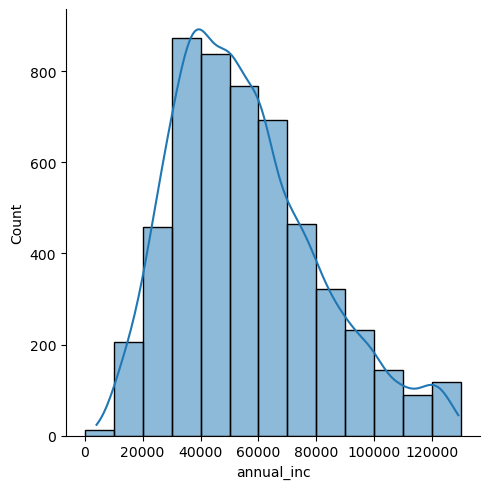

In [1137]:
sns.displot(data=loan,x='annual_inc',kde=True,bins=range(0,140000,10000))

**Inference**
1. annual income distribution is slightly left skewed with high peak. meaning lower income borrowers have a slighly high chance of defaulting. 
2. Majority of charged off loans are from income range 40K-70K

In [1139]:
#Analyse installment
loan.installment.describe()

count    5218.000000
mean      324.762489
std       208.277646
min        22.790000
25%       166.902500
50%       284.050000
75%       436.910000
max      1305.190000
Name: installment, dtype: float64

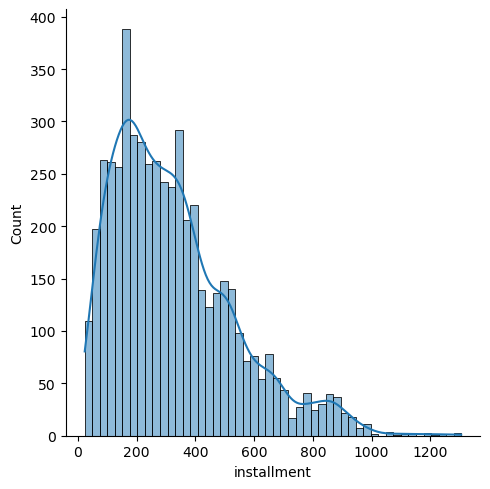

In [1140]:
#Plotting Installments
sns.displot(data=loan,x='installment',bins=50,kde=True)

**Inference**
1. Loans with installments between 80-300 faced issues with repayment. 

### Bi-variate Analysis

#### Defining variable pairs
    - As part of the analysis, let's look at below variable pairs. 
      - loan_amnt and int_rate
      - grade and loan_amnt with subgrade
      - term and loan_amnt
      - emp_length and loan_amnt
      - annual_inc and loan_amount
      - loan_amnt and term
      - home_ownership and loan_amnt
      - verification_status and loan_amnt

<Axes: xlabel='loan_amnt', ylabel='int_rate'>

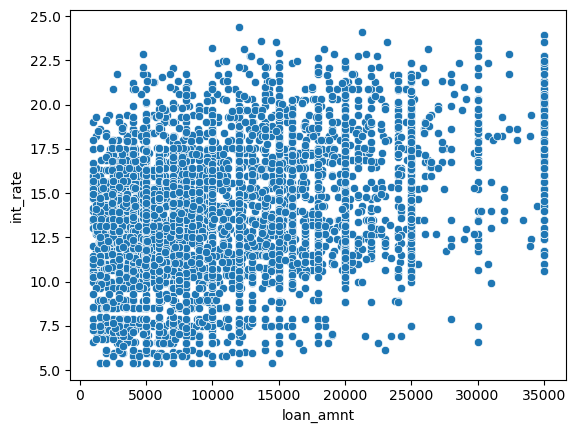

In [1144]:
sns.scatterplot(data=loan,x='loan_amnt',y='int_rate')

<Axes: xlabel='loan_amnt', ylabel='int_rate'>

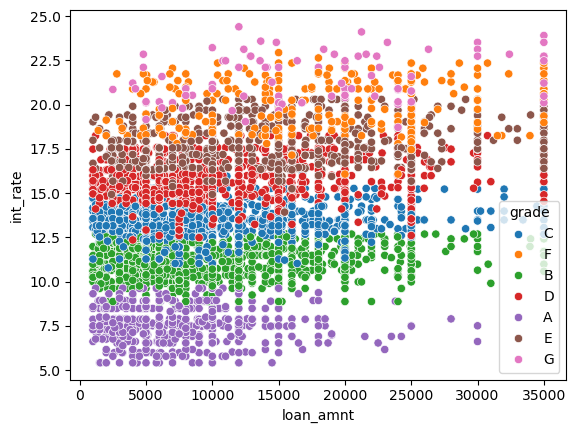

In [1145]:
#plotting loan amount against interest rate with grade hue.
sns.scatterplot(data=loan,x='loan_amnt',y='int_rate',hue='grade')

**Inference**
1. High grade loans in A,B,C tend to have lower interest rate.
2. Low grade loans which carry higher risk are offset with higher interest rate.

####  Analysing loan amount against grade of loans

<Axes: xlabel='grade', ylabel='loan_amnt'>

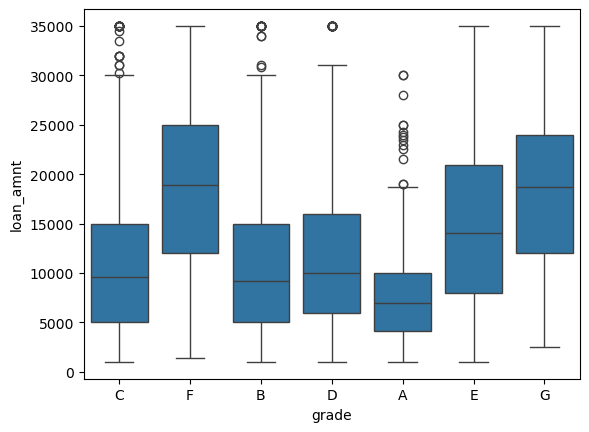

In [1148]:
sns.boxplot(data=loan,x='grade',y='loan_amnt')

**Inferences**
1. Lower grade loans F,D,E and G have higher max and median values than higher grade loans A,B and C.
2. Higher loan amounts were sanctioned for lower grade loans at a higher interest rate as inferred from last plot. Increasing the risk for LC.

####  Analysing loan amount against loan terms

<Axes: xlabel='term', ylabel='loan_amnt'>

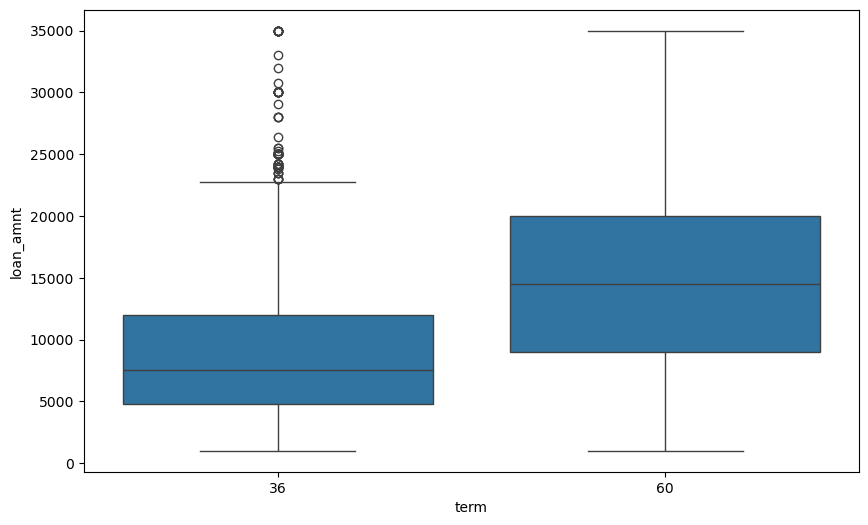

In [1151]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=loan,x='term',y='loan_amnt')

**Inference**
1. Lower term loans tend are disbursed for smaller amounts while higher terms loans have higher loan amounts.

####  Analysing loan amount against employment length

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

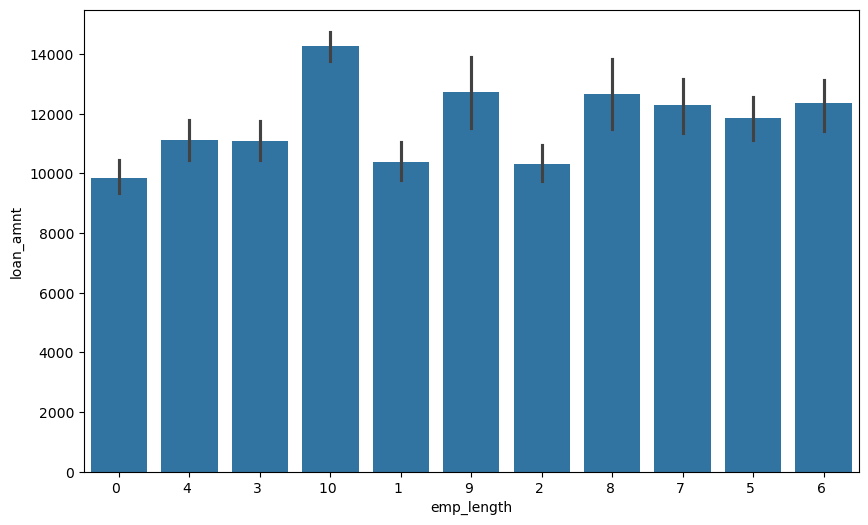

In [1154]:
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=loan,x='emp_length',y='loan_amnt')

**Inference**
1. we see an upward trend in loan amount as the borrower employment length grows.
2. This could be due to increaseing financial stability and employees starting to settle in their personal lives.

#### Analysing loan amount against purpose of loan

<Axes: xlabel='purpose', ylabel='loan_amnt'>

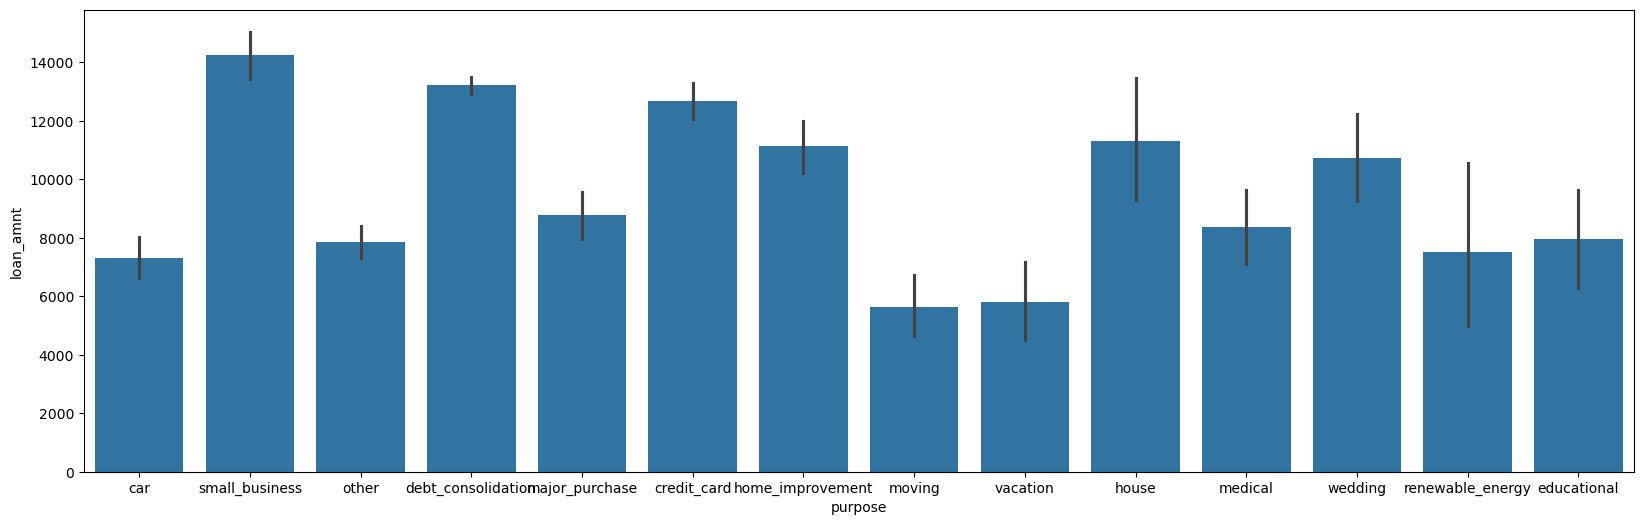

In [1157]:
fig,ax = plt.subplots(figsize=(20,6))
sns.barplot(data=loan,x='purpose',y='loan_amnt')

**Inference**
1. Most high value loans are sanctioned for Small Business, followed by debt consolidation, house, home_improvement and wedding

#### Analysing loan amount against annual income

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

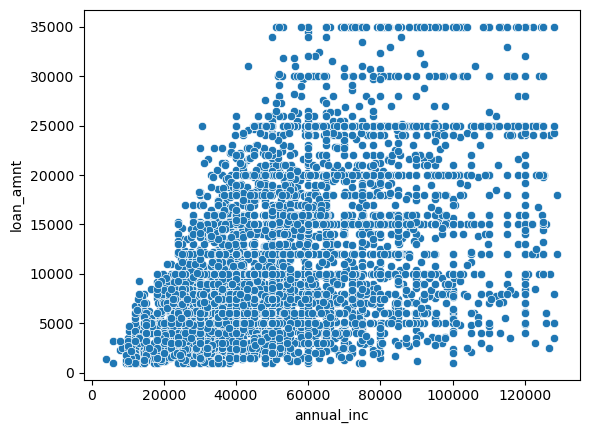

In [1160]:
sns.scatterplot(data=loan,x='annual_inc',y='loan_amnt')

**Inference**
- most of the loans are concentrated in the lower left and gradually scatter to up-right.
  - most defaulted loans are taken for smaller amounts and by people with lower income.

####  Analysing loan amount against income verification status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

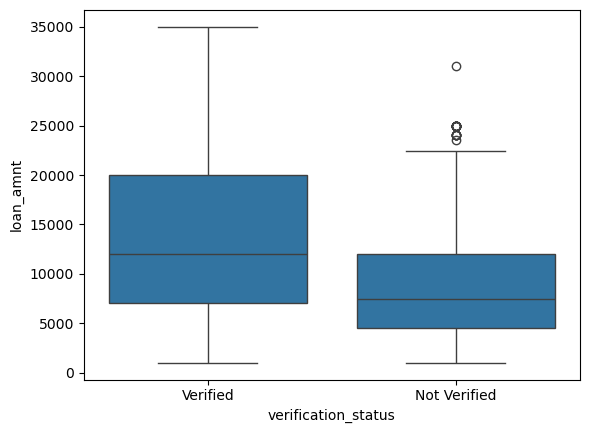

In [1163]:
sns.boxplot(data=loan,x='verification_status',y='loan_amnt')

####  Analysing loan amount against home ownership status

<Axes: xlabel='home_ownership', ylabel='loan_amnt'>

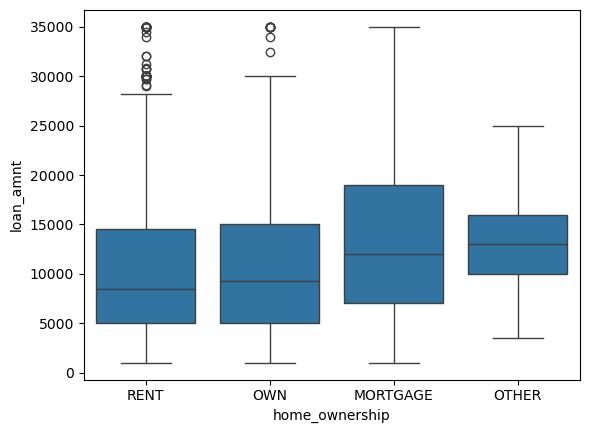

In [1165]:
sns.boxplot(data=loan,x='home_ownership',y='loan_amnt')

**Inference**
- people who rent or own houses have similar loan requirement.
- people who have mortgages tend to go for higher loan amounts which could be explained by their higher financial responsibilities.

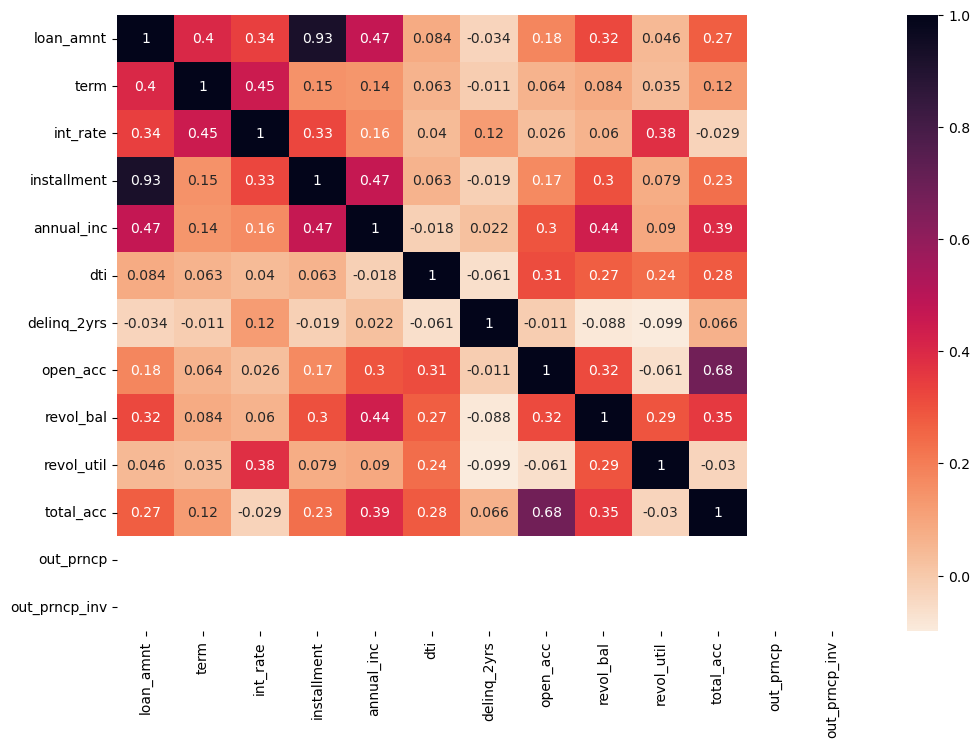

In [1167]:
# Heatmap of correlation between variables
numeric_df = loan.select_dtypes(include=['number'])
#dropping columns which have been found to have no impact on loans defaults.
numeric_df = numeric_df.drop(['funded_amnt','funded_amnt_inv','sub_grade','inq_last_6mths','pub_rec','pub_rec_bankruptcies','issue_d_year','issue_d_month','earliest_cr_line_year','earliest_cr_line_month'],axis=1)
# Plotting the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='rocket_r')  # 'coolwarm' is a good colormap for heatmaps
plt.show()

**Inferences**
- Very Strong Correlations (.8 and above)
  - loan amount with installment
- Strong Correlations (.6-.79)
  - open accounts with total accounts
- Moderate Correlations (0.4-0.59)
  - term with loan_amnt
  - term with annual_inc
  - term with int_rate
  - installment with annual_inc
  - annual_inc with revol_balance
- Weak Correlations (0.2 - 0.39)
  - loan_amnt with  int_rate and total_acc
  - int_rate with installment and revol_util
  - installment with revol_bal and total_acc
  - emp_length with annual_inc
  - annual_inc with open_acc and total_acc
  - dti with open_acc, revol_bal, revol_util and total_acc
  - open_acc with revol_bal
  - revol_bal with revol_util and total_acc
- Very Weak Correlations(0-0.19)
  - loan_amnt with dti, revol_util and open_acc
  - term with installment, emp_length, annual_inc, dti,open_acc, revol_bal,revol_util and total_acc
  - int_rate with emp_length, annual_inc,dti,open_acc,revol_bal, total_acc
  - installments with emp_length, dti, open_acc,revol_util
  - emp_length with dti,open_acc,revol_bal,revol_util,total_acc
  - annual_inc with dti,revol_util
  - open_acc with revol_util
  - revol_util with total_acc